# Provincial indicators 2020

# Table of contents

1. [Imports](#1)
2. [Elaboration of the data](#2)
3. [Computation of the indicators](#3) <br>
    3a. [Provincial prevalence](#3a) <br>
    3b. [Week provincial trend](#3b) <br>

# Brief introduction
In this notebook we compute the provincial indicators that will be used for the successive cluster analysis and study their distribution (in particular we check the normality assumption). <br>
However before computing the indicators we first proceed to do the necessary steps to map the total population variable from the residents datasets to the covid datasets.

<a id='1'></a>
## 1. Imports

In [1]:
import pandas as pd
import numpy as np
import copy
import os
import matplotlib.pyplot as plt
from scipy import stats

<a id='2'></a>
## 2. Elaboration of the data

We first load the data:

In [2]:
covid_provinces_2020=pd.read_csv("../Results/covid_provinces_2020.csv")
residents_provinces_2020=pd.read_csv("../Results/residents_provinces_2020.csv")

Before computing the indicators we need to attach the total population of each province to the corresponding row in the covid_provinces_2020 dataset.
In such a way we will later be able to compute easily the indicators.

First of all we store in residents_provinces_2020_total the data from the residents_provinces_2020 dataset concerning the whole provinces population(corresponding to the rows with variable Age equal to "Totale").

In [3]:
residents_provinces_2020_total=residents_provinces_2020[residents_provinces_2020["Age"]=="Totale"].reset_index(drop=True)
residents_provinces_2020_total

Province Code               Province     Age  Male Population  \
0                1                 Torino  Totale        1079491.0   
1                2               Vercelli  Totale          82360.0   
2                3                 Novara  Totale         177671.0   
3                4                  Cuneo  Totale         289284.0   
4                5                   Asti  Totale         103913.0   
..             ...                    ...     ...              ...   
102            103   Verbano-Cusio-Ossola  Totale          75812.0   
103            108  Monza e della Brianza  Totale         426302.0   
104            109                  Fermo  Totale          83912.0   
105            110  Barletta-Andria-Trani  Totale         190156.0   
106            111           Sud Sardegna  Totale         170793.0   

     Female Population  Date  Total Population  
0            1151455.0  2020         2230946.0  
1              87030.0  2020          169390.0  
2             187309.0  2020          364980.0  
3             296829.0  2020          586113.0  
4             108097.0  2020          212010.0  
..                 ...   ...               ...  
102            80508.0  2020          156320.0  
103           443891.0  2020          870193.0  
104            87825.0  2020          171737.0  
105           194645.0  2020          384801.0  
106           173402.0  2020          344195.0  

[107 rows x 7 columns]

As we can see the dataset contains a row for each one of the italian provinces (that are 107).

In [4]:
print(sorted(residents_provinces_2020_total["Province"]))

['Agrigento', 'Alessandria', 'Ancona', 'Arezzo', 'Ascoli Piceno', 'Asti', 'Avellino', 'Bari', 'Barletta-Andria-Trani', 'Belluno', 'Benevento', 'Bergamo', 'Biella', 'Bologna', 'Bolzano/Bozen', 'Brescia', 'Brindisi', 'Cagliari', 'Caltanissetta', 'Campobasso', 'Caserta', 'Catania', 'Catanzaro', 'Chieti', 'Como', 'Cosenza', 'Cremona', 'Crotone', 'Cuneo', 'Enna', 'Fermo', 'Ferrara', 'Firenze', 'Foggia', 'Forlì-Cesena', 'Frosinone', 'Genova', 'Gorizia', 'Grosseto', 'Imperia', 'Isernia', "L'Aquila", 'La Spezia', 'Latina', 'Lecce', 'Lecco', 'Livorno', 'Lodi', 'Lucca', 'Macerata', 'Mantova', 'Massa-Carrara', 'Matera', 'Messina', 'Milano', 'Modena', 'Monza e della Brianza', 'Napoli', 'Novara', 'Nuoro', 'Oristano', 'Padova', 'Palermo', 'Parma', 'Pavia', 'Perugia', 'Pesaro e Urbino', 'Pescara', 'Piacenza', 'Pisa', 'Pistoia', 'Pordenone', 'Potenza', 'Prato', 'Ragusa', 'Ravenna', 'Reggio di Calabria', "Reggio nell'Emilia", 'Rieti', 'Rimini', 'Roma', 'Rovigo', 'Salerno', 'Sassari', 'Savona', 'Siena',

Now we check the name of the Italian provinces in the covid_provinces_2020 dataset, to be sure that we will be able to map correctly the total population to the corresponding row in covid_provinces_2020.

In [5]:
print("Provinces' names in covid_provinces_2020:","\n",covid_provinces_2020["Province_name"].unique())
print("\n","While the number of provinces in covid_provinces_2020 is:",len(sorted(covid_provinces_2020["Province_name"].unique())))

Provinces' names in covid_provinces_2020: 
 ["L'Aquila" 'Teramo' 'Pescara' 'Chieti'
 'In fase di definizione/aggiornamento' 'Potenza' 'Matera' 'Cosenza'
 'Catanzaro' 'Reggio di Calabria' 'Crotone' 'Vibo Valentia' 'Caserta'
 'Benevento' 'Napoli' 'Avellino' 'Salerno' 'Piacenza' 'Parma'
 "Reggio nell'Emilia" 'Modena' 'Bologna' 'Ferrara' 'Ravenna'
 'Forlì-Cesena' 'Rimini' 'Udine' 'Gorizia' 'Trieste' 'Pordenone' 'Viterbo'
 'Rieti' 'Roma' 'Latina' 'Frosinone' 'Imperia' 'Savona' 'Genova'
 'La Spezia' 'Varese' 'Como' 'Sondrio' 'Milano' 'Bergamo' 'Brescia'
 'Pavia' 'Cremona' 'Mantova' 'Lecco' 'Lodi' 'Monza e della Brianza'
 'Pesaro e Urbino' 'Ancona' 'Macerata' 'Ascoli Piceno' 'Fermo'
 'Campobasso' 'Isernia' 'Bolzano' 'Trento' 'Torino' 'Vercelli' 'Novara'
 'Cuneo' 'Asti' 'Alessandria' 'Biella' 'Verbano-Cusio-Ossola' 'Foggia'
 'Bari' 'Taranto' 'Brindisi' 'Lecce' 'Barletta-Andria-Trani' 'Sassari'
 'Nuoro' 'Cagliari' 'Oristano' 'Sud Sardegna' 'Trapani' 'Palermo'
 'Messina' 'Agrigento' 'Caltanisset

Now a possible problems we could have are: 
1. There are two "provinces" more: 'Fuori Regione / Provincia Autonoma', 'In fase di definizione/aggiornamento'
2. "Bolzano" corresponds to "Bolzano/Bozen" in residents_provinces_2020_total
3. "Massa Carrara" corresponds to "Massa-Carrara" in residents_provinces_2020_total
3. "Aosta" corresponds to "Valle d'Aosta/Vallée d'Aoste" in residents_provinces_2020_total
<br>
<br> For the last two points it is enough to change the name in the rows of the residents dataset. Instead for the first point we should just remove those rows.

In [6]:
covid_provinces_2020_modified = covid_provinces_2020

covid_provinces_2020_modified = covid_provinces_2020_modified.set_index("Province_name")
covid_provinces_2020_modified = covid_provinces_2020_modified.drop( ['Fuori Regione / Provincia Autonoma', 'In fase di definizione/aggiornamento'], axis=0)
covid_provinces_2020_modified=covid_provinces_2020_modified.reset_index()

#Check: How many provinces we have now?
len(covid_provinces_2020_modified["Province_name"].unique())

107

Let's check in which rows the provinces with the names to change are:

In [7]:
print(np.where(residents_provinces_2020_total["Province"] == "Bolzano/Bozen"))
print(np.where(residents_provinces_2020_total["Province"] == "Massa-Carrara"))
print(np.where(residents_provinces_2020_total["Province"] == "Valle d'Aosta/Vallée d'Aoste"))

(array([20], dtype=int64),)
(array([44], dtype=int64),)
(array([6], dtype=int64),)


In [8]:
residents_provinces_2020_total.loc[20,"Province"] = "Bolzano"
residents_provinces_2020_total.loc[44,"Province"] = "Massa Carrara"
residents_provinces_2020_total.loc[6,"Province"] = "Aosta"

Now we effectively map the total population of each province to the corresponding row in the covid_provinces_2020_modified dataset:

In [9]:
provinces_pop=dict(zip(residents_provinces_2020_total["Province"],residents_provinces_2020_total["Total Population"]))
covid_provinces_2020_modified['Total_population'] = covid_provinces_2020_modified['Province_name'].map(provinces_pop)

In [10]:
covid_provinces_2020_modified.head()

Province_name                 Date  Region_code Region_name  Province_code  \
0      L'Aquila  2020-02-24 18:00:00           13     Abruzzo             66   
1        Teramo  2020-02-24 18:00:00           13     Abruzzo             67   
2       Pescara  2020-02-24 18:00:00           13     Abruzzo             68   
3        Chieti  2020-02-24 18:00:00           13     Abruzzo             69   
4       Potenza  2020-02-24 18:00:00           17  Basilicata             76   

  province_short_name  Total_cases  Year  Total_population  
0                  AQ            0  2020          294838.0  
1                  TE            0  2020          303900.0  
2                  PE            0  2020          316363.0  
3                  CH            0  2020          378840.0  
4                  PZ            0  2020          358401.0

<a id='3'></a>
## 3. Computation of the indicators

The provincial indicators that were computed in the paper are:<br>
1. The provincial prevalence of SARS-CoV-2 cases on 3 May 2020 (i.e., expressed as the number of total cases per 10,000 residents);
2. The weekly provincial trend of SARS-CoV-2 cases from 27 April to 3 May 2020 (expressed as percentage of increment of total cases); 

<a id='3a'></a>
### 3a.Provincial Prevalence

In [11]:
provincial_prevalence_table = pd.crosstab([covid_provinces_2020_modified['Province_name'],covid_provinces_2020_modified["Date"]=="2020-05-03 17:00:00"], 
                                             values=10000*covid_provinces_2020_modified['Total_cases']/covid_provinces_2020_modified['Total_population'],
                                             aggfunc='sum',
                                            columns=['Provincial_prevalence'])
provincial_prevalence_table.columns.name=None
temp=provincial_prevalence_table.reorder_levels(["Date","Province_name"])
provincial_prevalence_table=temp.iloc[temp.index.get_level_values("Date")==True]
provincial_prevalence_table

Provincial_prevalence
Date Province_name                       
True Agrigento                   3.187812
     Alessandria                85.887924
     Ancona                     38.870384
     Aosta                      91.335157
     Arezzo                     19.105351
...                                   ...
     Vercelli                   67.477419
     Verona                     51.906370
     Vibo Valentia               4.847623
     Vicenza                    31.719976
     Viterbo                    12.782647

[107 rows x 1 columns]

We do a bar plot of teh provincial prevalence:

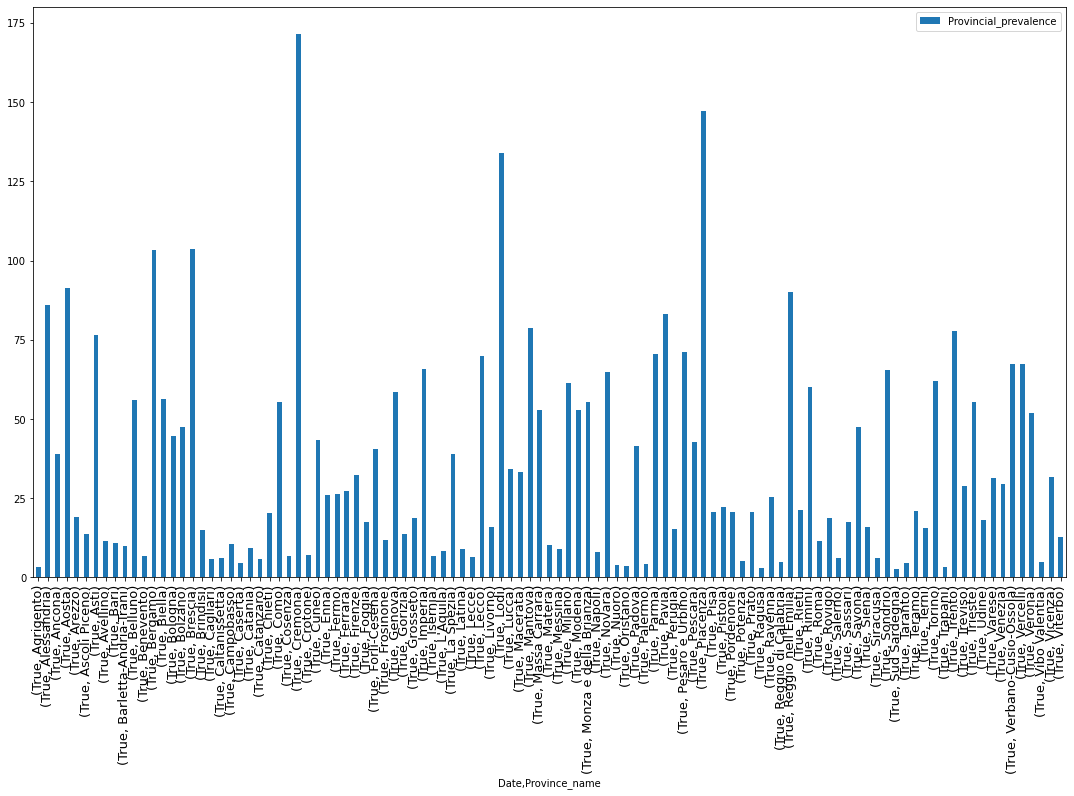

In [12]:
provincial_prevalence_table.plot(kind='bar')

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

ax=plt.gca()
ax.tick_params(axis='x', which='major', labelsize=13)
plt.show()

The highest prevalence has been reached in Cremona.

Then we check the distribution of the indicator:

In [13]:
mean=np.nanmean(provincial_prevalence_table)
print("The mean is:",mean)
variance=np.var(provincial_prevalence_table)
print("The variance is:",variance)
skewness=stats.skew(provincial_prevalence_table, nan_policy="omit")
print("The skewness of the distribution is:",skewness)

The mean is: 35.32725928200878
The variance is: Provincial_prevalence    1084.058192
dtype: float64
The skewness of the distribution is: [1.51787696]


Now we do a density plot of teh distribution of the indicator:

<AxesSubplot:ylabel='Density'>

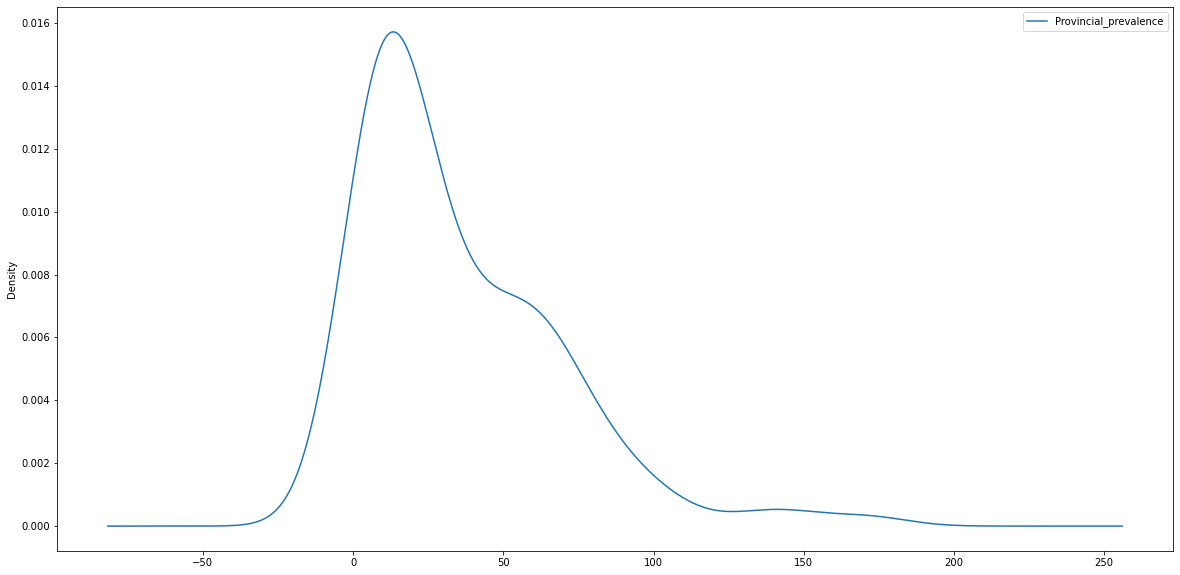

In [14]:
plt.rcParams['figure.figsize'] = (20, 10)
provincial_prevalence_table.plot(kind='density')

We now test for skewness: H0 = skewness fo Normal distribution

In [15]:
skewtest=stats.skewtest(provincial_prevalence_table, nan_policy="omit")
skewtest

SkewtestResult(statistic=array([5.21826705]), pvalue=array([1.80604936e-07]))

We reject the null hypothesis

<a id='3b'></a>
### 3b. Week provincial trend

We consider the week from the 27th of April to the 3rd of May.
To take into consideration just that week we need to create a mask and "select" only the rows corresponding to the the week to analyze:

In [16]:
covid_provinces_2020_modified['Date_new'] = pd.to_datetime(covid_provinces_2020_modified['Date'])

In [17]:
mask = (covid_provinces_2020_modified['Date_new'] >= "2020-04-27") & (covid_provinces_2020_modified['Date_new'] < "2020-05-04")
covid_provinces_2020_modified_week = covid_provinces_2020_modified.loc[mask]

In [18]:
covid_provinces_2020_modified_week.tail()

Province_name                 Date  Region_code Region_name  \
7485       Belluno  2020-05-03 17:00:00            5      Veneto   
7486       Treviso  2020-05-03 17:00:00            5      Veneto   
7487       Venezia  2020-05-03 17:00:00            5      Veneto   
7488        Padova  2020-05-03 17:00:00            5      Veneto   
7489        Rovigo  2020-05-03 17:00:00            5      Veneto   

      Province_code province_short_name  Total_cases  Year  Total_population  \
7485             25                  BL         1129  2020          201309.0   
7486             26                  TV         2551  2020          883522.0   
7487             27                  VE         2502  2020          848829.0   
7488             28                  PD         3867  2020          933700.0   
7489             29                  RO          431  2020          231734.0   

                Date_new  
7485 2020-05-03 17:00:00  
7486 2020-05-03 17:00:00  
7487 2020-05-03 17:00:00  
7488 2020-05-03 17:00:00  
7489 2020-05-03 17:00:00

We proceed to compute a column with the total cases variation per day per province in the week from 27th April - 3rd May.

I check if the order if provinces is repeting (in such a way we can use directly the indexes as in the cell below).

In [19]:
x=covid_provinces_2020_modified_week["Province_name"]
y=covid_provinces_2020_modified.loc[6741-107:7489-107,"Province_name"]
x=x.reset_index(drop=True)
y=y.reset_index(drop=True)
for i in range(len(x)):
    if x[i]!=y[i]:
        print("The sliced sequence is not ok at step",i)
        break
    if i==len(x)-1:
        print("The sliced sequence is ok")

The sliced sequence is ok


In [20]:
import warnings
warnings.filterwarnings('ignore')

We compute a column with the total cases variation from one day to the other in each province:

In [21]:
covid_provinces_2020_modified_week["Old_province_name"]=list(covid_provinces_2020_modified.loc[6741-107:7489-107,"Province_name"])
covid_provinces_2020_modified_week["Old_date"]=list(covid_provinces_2020_modified.loc[6741-107:7489-107,"Date_new"])
covid_provinces_2020_modified_week["Old_total_cases"]=list(covid_provinces_2020_modified.loc[6741-107:7489-107,"Total_cases"])
covid_provinces_2020_modified_week["Total_cases_variation"]= covid_provinces_2020_modified_week["Total_cases"] - covid_provinces_2020_modified_week["Old_total_cases"]

In [22]:
covid_provinces_2020_modified_week

Province_name                 Date  Region_code Region_name  \
6741      L'Aquila  2020-04-27 17:00:00           13     Abruzzo   
6742        Teramo  2020-04-27 17:00:00           13     Abruzzo   
6743       Pescara  2020-04-27 17:00:00           13     Abruzzo   
6744        Chieti  2020-04-27 17:00:00           13     Abruzzo   
6745       Potenza  2020-04-27 17:00:00           17  Basilicata   
...            ...                  ...          ...         ...   
7485       Belluno  2020-05-03 17:00:00            5      Veneto   
7486       Treviso  2020-05-03 17:00:00            5      Veneto   
7487       Venezia  2020-05-03 17:00:00            5      Veneto   
7488        Padova  2020-05-03 17:00:00            5      Veneto   
7489        Rovigo  2020-05-03 17:00:00            5      Veneto   

      Province_code province_short_name  Total_cases  Year  Total_population  \
6741             66                  AQ          242  2020          294838.0   
6742             67                  TE          635  2020          303900.0   
6743             68                  PE         1274  2020          316363.0   
6744             69                  CH          723  2020          378840.0   
6745             76                  PZ          178  2020          358401.0   
...             ...                 ...          ...   ...               ...   
7485             25                  BL         1129  2020          201309.0   
7486             26                  TV         2551  2020          883522.0   
7487             27                  VE         2502  2020          848829.0   
7488             28                  PD         3867  2020          933700.0   
7489             29                  RO          431  2020          231734.0   

                Date_new Old_province_name            Old_date  \
6741 2020-04-27 17:00:00          L'Aquila 2020-04-26 17:00:00   
6742 2020-04-27 17:00:00            Teramo 2020-04-26 17:00:00   
6743 2020-04-27 17:00:00           Pescara 2020-04-26 17:00:00   
6744 2020-04-27 17:00:00            Chieti 2020-04-26 17:00:00   
6745 2020-04-27 17:00:00           Potenza 2020-04-26 17:00:00   
...                  ...               ...                 ...   
7485 2020-05-03 17:00:00           Belluno 2020-05-02 17:00:00   
7486 2020-05-03 17:00:00           Treviso 2020-05-02 17:00:00   
7487 2020-05-03 17:00:00           Venezia 2020-05-02 17:00:00   
7488 2020-05-03 17:00:00            Padova 2020-05-02 17:00:00   
7489 2020-05-03 17:00:00            Rovigo 2020-05-02 17:00:00   

      Old_total_cases  Total_cases_variation  
6741              241                      1  
6742              635                      0  
6743             1260                     14  
6744              723                      0  
6745              178                      0  
...               ...                    ...  
7485             1124                      5  
7486             2539                     12  
7487             2487                     15  
7488             3867                      0  
7489              430                      1  

[749 rows x 14 columns]

Now we can compute the indicator:

In [23]:
week_provincial_trend_table = pd.crosstab(covid_provinces_2020_modified_week['Province_name'], 
                                             values=10000*covid_provinces_2020_modified_week['Total_cases_variation']/covid_provinces_2020_modified_week['Total_population'],
                                             aggfunc='mean',
                                            columns=['Week_provincial_trend'])
week_provincial_trend_table.columns.name=None
week_provincial_trend_table

Week_provincial_trend
Province_name                       
Agrigento                   0.010120
Alessandria                 1.355693
Ancona                      0.064178
Aosta                       0.411317
Arezzo                      0.130570
...                              ...
Vercelli                    0.446982
Verona                      0.475808
Vibo Valentia               0.027701
Vicenza                     0.265572
Viterbo                     0.083004

[107 rows x 1 columns]

We do a bar plot:

<AxesSubplot:xlabel='Province_name'>

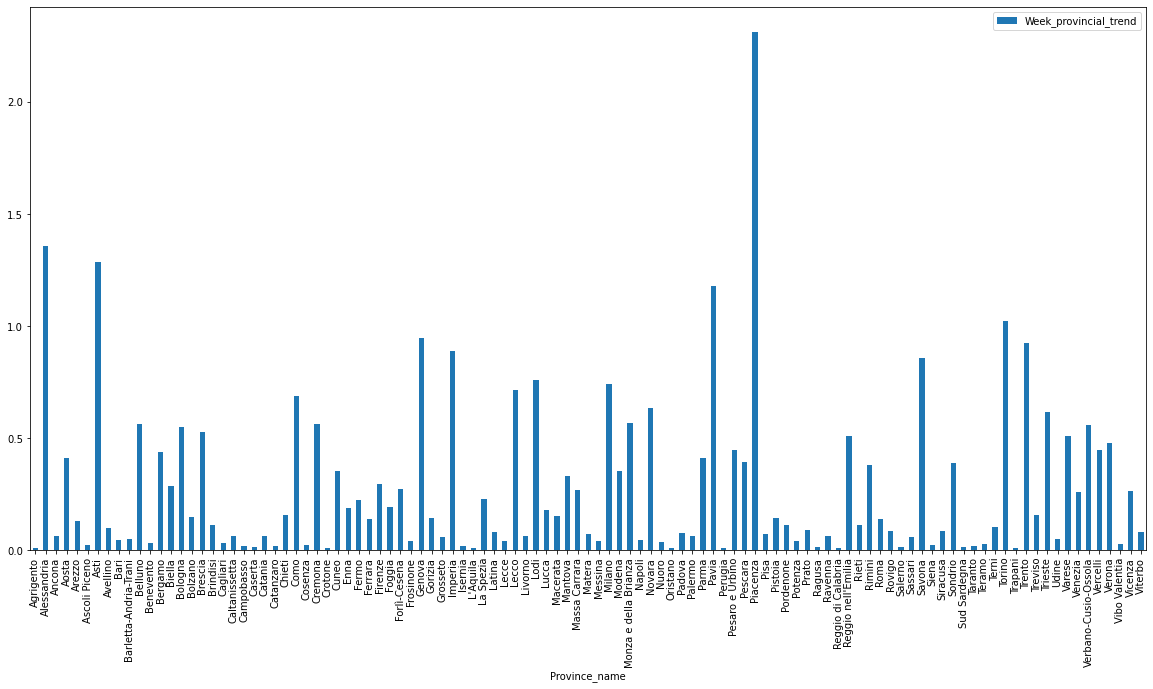

In [24]:
week_provincial_trend_table.plot(kind='bar')

The highest increment has been in Cremona.

We check teh distribution of teh indicator:

In [25]:
mean=np.nanmean(week_provincial_trend_table)
print("Mean:",mean)
variance=np.var(week_provincial_trend_table)
print("Variance:",variance)
skewness=stats.skew(week_provincial_trend_table, nan_policy="omit")
print("skewness",skewness)

Mean: 0.2852251702643001
Variance: Week_provincial_trend    0.131462
dtype: float64
skewness [2.4347742]


We do a density plot:

<AxesSubplot:ylabel='Density'>

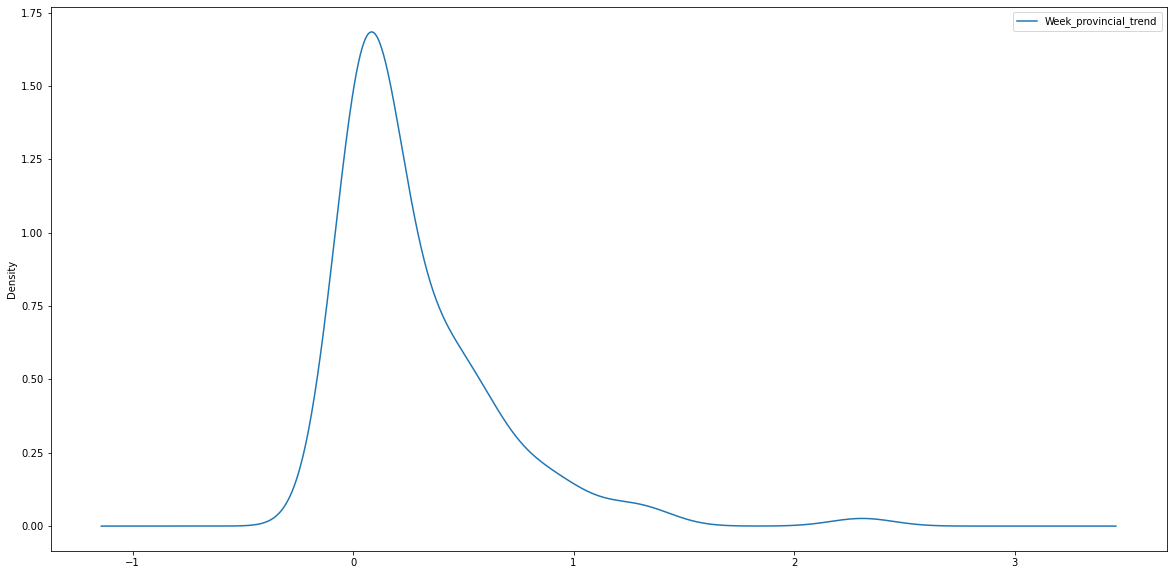

In [26]:
week_provincial_trend_table.plot(kind='density')

And finally we do a skewness test:

In [27]:
skewtest=stats.skewtest(week_provincial_trend_table, nan_policy="omit")
skewtest

SkewtestResult(statistic=array([6.9408026]), pvalue=array([3.89878489e-12]))

We reject the null hypothesis.